In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
img = cv2.imread('images/soccer_field.jpg', cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [36]:
color = [255, 0, 0]
x = [418.2500, 914.7500, 455.7500, 70.2500]
y = [149.5000, 244.000, 391.0000, 185.5000]

In [37]:
pts = np.array(list(map(lambda x, y: [int(x), int(y)], x, y)))
out_img = cv2.polylines(img.copy(), [pts], isClosed=True, color=color, thickness=2)

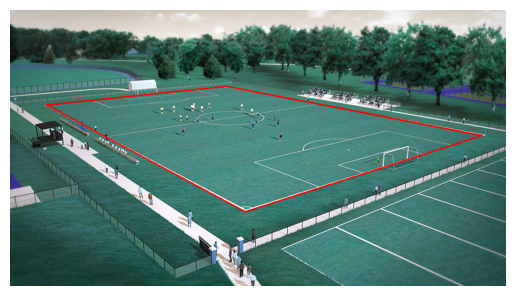

In [38]:
plt.imshow(out_img)
plt.axis('off')
plt.show()

In [39]:
x_ = [0, 20*55, 20*55, 0]
y_ = [0, 0, 20*36.6, 20*36.6]
pts_ = np.array(list(map(lambda x,y: [int(x), int(y)], x_, y_)))
homo, stats = cv2.findHomography(pts, pts_)

In [40]:
M2P = 20
OUT_SHAPE = [int(M2P*55), int(M2P*36.6)]

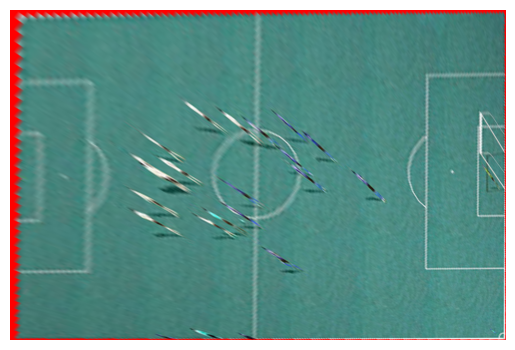

In [41]:
warp_img = cv2.warpPerspective(out_img, homo, [int(20*55), int(20*36.6)])
plt.imshow(warp_img)
plt.axis('off')
plt.show()

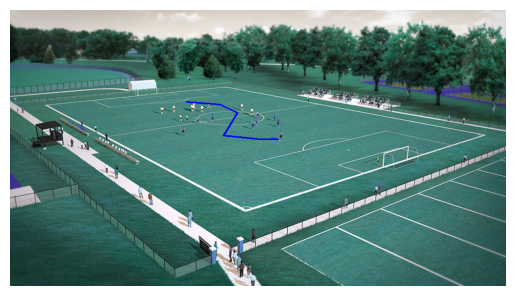

In [42]:
xt = [518.7500, 484.2500, 413.7500, 440.7500, 406.2500, 341.7500]
yt = [251.5000, 251.5000, 244.0000, 200.5000, 184.0000, 179.5000]
pts_ = np.array(list(map(lambda x, y: [int(x), int(y)], xt, yt)))
out_img = cv2.polylines(img.copy(), [pts_], isClosed=False, color=[0, 0, 255], thickness=2)
plt.imshow(out_img)
plt.axis('off')
plt.show()

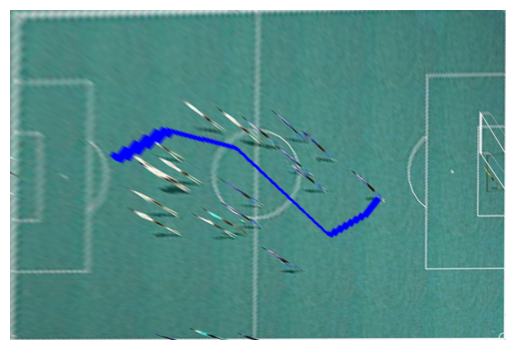

In [43]:
warp_img_ = cv2.warpPerspective(out_img, homo, [int(20*55), int(20*36.6)])
plt.imshow(warp_img_)
plt.axis('off')
plt.show()

In [44]:
warp_pts = cv2.perspectiveTransform(pts_.reshape(-1, 1, 2).astype(np.float32), homo).reshape(-1, 2)
warp_pts = warp_pts.astype(np.int32)
temp = cv2.polylines(warp_img.copy(), [warp_pts], isClosed=False, color=[0, 0, 255], thickness=2)

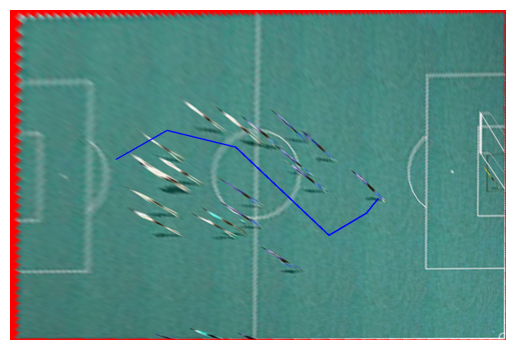

In [45]:
plt.imshow(temp)
plt.axis('off')
plt.show()

In [46]:
length = cv2.arcLength(warp_pts, False) / 20
print(length)

35.415152359008786
